# **A simplified optimal policy model for setting carbon taxes on fossil fuels**

Olivier Pannekoucke 
INPT-ENM / CNRM / CERFACS

<h3 style="font-variant:small-caps;"><center>Abstract</center></h3>

<div style="margin:0 50px 0 50px">
<div style="background:rgb(230,230,255)">

    
In this activity, we consider a simple integrated model that is designed to find an optimal path of consumption in presence of externality: a population consumes an exhaustible resource that involve a source of CO2 in the atmospher, leading to a damage that limits the welfare. This model takes to form of a social planner introduced to find an optimal path of consumption. 

After detailling the model on a finite horizon time, a numerical exploration is proposed to asses the optimal path and how lagrangian multiplier (shadow price) are used to set an optimal carbon tax so to reach an optimal policy.
    
 </div>
<b>keywords</b>: <i> Hoel-Kverndokk model, carbon tax, pigouvian tax, optimal policy, backstop technology</i>
</div>




## **1. Introduction**

**Background on Hoel-Kverndokk (HK) model**


Integrated assessement model relies on the coupling between an simplified version of the Earth system with the economics. This kind of model is very interesting because it is simple enough to run on a computer while interesting since it provides optimal policy to limit the climate change at an economical level. The latter point is related to pigouvian tax that explain how to internalize an externality in the economical modelling by constraining the producer/consumer thanks to a tax, here the carbon tax.

The HK model introduces a simple modelling of the balance between the extraction of exhaustible fossil fuel and the release in the atmosphere of carbon leading to damage due to the climate change. The aims is to maximize the discount social welfare that is maximizing the social utility in presence of negative externalities.

**Organization of the notebook**

First we introduce a simplified version of the HK model Section 2, in particular we detail the theoretical equation for the equilibrium that appears in this problem. Section 3 introduces numerical tools that are used to validate the computation. Section 3 is devoted to the mitigation through a policy and how optimal policy can leads to maximization of the social welfare while in a decentralized economy.

**References**

 * M. Hoel and S. Kverndokk, “Depletion of fossil fuels and the impacts of global warming,” Resource and Energy Economics, vol. 18, no. 2, pp. 115–136, Jun. 1996, doi: 10.1016/0928-7655(96)00005-x.
 

## **2. Optimal path resultgin from the social planner picture in the Hoel & Kverndokk simplified model**

### **2.1 Economical modelling of the coupling economy-atmospher-impact**

**Extraction of exhaustible fossil fuel**

The extraction (and its instantaneous consumption) of fossil fuel is denoted by $x$.

**Dynamics of CO2 stock present in the atmosphere (or within the Earth system)**

We denote by $S_\mathrm{pre-indus.}$ the stock of CO2 that was present in the atmospher before the industrial developpement, and that is considered here as an equilibrium quantity of CO2. In particular, $S_\mathrm{pre-indus.}$ is assumed to the be long term stationnary stock of CO2 after a relaxation period.

If $\tilde{S}=S+S_\mathrm{pre-indus.}$ denotes the stock of CO2 present in the atmosphere, then the dynamics of $\tilde{S}$ can be considered as $\dot{\tilde{S}}=x-\delta \left(\tilde{S}-S_\mathrm{pre-indus.}\right)$. 

Hence **$S\geq 0$ is the atmospheric stock of carbon in excess of the preindustrial stock**, and its reads as 
$$\dot S = x - \delta S,$$
so that, without CO2 forcing, $\lim_{t}S(t) = 0$.

***Summary***

 * $x$ **extraction (and consumption) of all fossil fuels in carbon unit**,
 * $S$ **atmospheric stock of carbon in excess of the preindustrial stock,**
 * $u(x)$ **benefits of the society from fossil fuel consumption**
 

### **2.2 Optimal path formulation**

Hoel & Kverndokk (HK) model explains the extraction/consumption by solving the following the optimization problem

$$
(3)\qquad
\left\{\begin{array}{l}
 c = \textrm{ArgMax}\, W= \int_0^T e^{-r t } \left( u(x) - D(S)\right)dt \\ 
\text{ s.t.}\\
\dot S = x - \delta S, \\
\text{ with } S(0)=S_0, x(t)\geq 0 \text{ and } S(t)\geq 0.
\end{array}\right.$$
where defining $u$ as  $u(x)=\int_0^x p(s)ds$ with $p(x)$ the consummer price, means it corresponds to the total willingness to pay where the marginal utility  equals to the consumer price $p(x)=u'(x)$.


**A particular form of utility (used in the numerical resolution)**

In the numerical similation, we consider the constant relative risk aversion utility 
$$u(x)=\frac{x^{1-\gamma}}{1-\gamma},$$ 
so that $0<u'(x)<\infty$ and $u''(x)<0$; and the damage function
$$D(S)=\omega S^2,$$
so that $0<D'(S)$ and $D''(S)>0$, with $(\gamma,\omega)=(0.5,0.033)$.

**Theoretical equilibrium in the HK model**

The utility of the consumption of exhaustible fossil fuel $u(x)$ being positive and concave, and the damage $-D(S)$ being negative with $D$ convex, we expect the existence of an equilibrium regim for the infinit horizon problem ($T=\infty$).

Decentrelized equation can be obtained from the Lagrangian formalism,
$$ \underset{x}{\mathrm{Max}} \;\underset{\mu\in\mathbb{R}}{\mathrm{Min}} \; \int_0^\infty e^{-rt}\mathcal{L}(x,S,\dot S,\mu) dt,$$
with 
$$ \mathcal{L}(x,S,\dot S,\mu)\equiv u(x)-D(S)+\mu\left(\dot S -x+\delta S\right),$$
and reads as 
$$
(4)\qquad
\left\{\begin{array}{cl}
(4.1) &\mu = u'(x),\\
(4.2) &\dot \mu = (r+\delta)\mu - D'(S),\\
(4.3) &\dot S = x-\delta S,\\
(4.4) &\lim_{t\rightarrow\infty} e^{-rt}\mu = 0.
\end{array}\right.$$
A stationnary solution  exists and reads as 
$$
(x^\ast,S^\ast) = \left( \left(\frac{2\omega}{\delta(r+\delta)}\right)^{\frac{-1}{1+\gamma}} ,  \frac{x^\ast}{\delta}\right)
$$


### **2.3 Numerical code**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import eco4weather

In [2]:
from eco4weather.hoel import SimplifiedHoelKverndokk as HoelKverndokk

In [3]:
def plot_traj(econ, equilirium_idx = None, control=None, traj=None):
    """
    Plot of the economical path in the reduced formulation of the HK model.
    When control and traj are None, the path is the optimal one
    """
    
    equilirium_idx = econ.ndt//2 if equilirium_idx is None else equilirium_idx
    
    
    control = econ.opt_control if control is None else control
    traj = econ.opt_traj if traj is None else traj    
    
    S = traj
    
    plt.figure(figsize=(12,4))

    plt.subplot(131)
    plt.plot(econ.time_window, S,label='S')
    plt.plot(econ.time_window[equilirium_idx], traj[equilirium_idx],'b.')
    plt.plot(econ.time_window[[0,-1]], 2*[econ.S_star],'r--',label='Equilibrium val. $S^\\star$')
    plt.xlabel('t')
    plt.title('(a) Stock time serie')
    plt.legend();

    plt.subplot(132)
    plt.plot(econ.time_window, control,label='x')
    plt.plot(econ.time_window[equilirium_idx], control[equilirium_idx],'b.')
    plt.plot(econ.time_window[[0,-1]], 2*[econ.x_star],'r--',label='Equilibrium val. $x^\\star$')
    plt.ylim(0,1.5)
    plt.title('(b) Extraction time serie')
    plt.xlabel('t')
    plt.legend()

    plt.subplot(133)
    plt.plot(control, S,label='opt. traj')
    plt.plot(control[0], traj[0],'r.',label='initial cond')
    plt.plot(control[equilirium_idx], traj[equilirium_idx],'b.',label='apparent Equili.')
    plt.plot(econ.x_star,econ.S_star,'g.',label='th Equili.')
    plt.xlabel('x (extraction)')
    plt.ylabel('S (atm. co2)')
    plt.title('(c) Phase plan')
    plt.legend();

### **2.4 Illustration of the computation of an optimal path for the reference experiment**

In [4]:
econs = {}

In [5]:
econs['ref'] = HoelKverndokk()
econ = econs['ref']

Time scheme is Euler for Econ studies, with time step dt of 0.5 yr, over 100 years


**Utility and Damage functions**

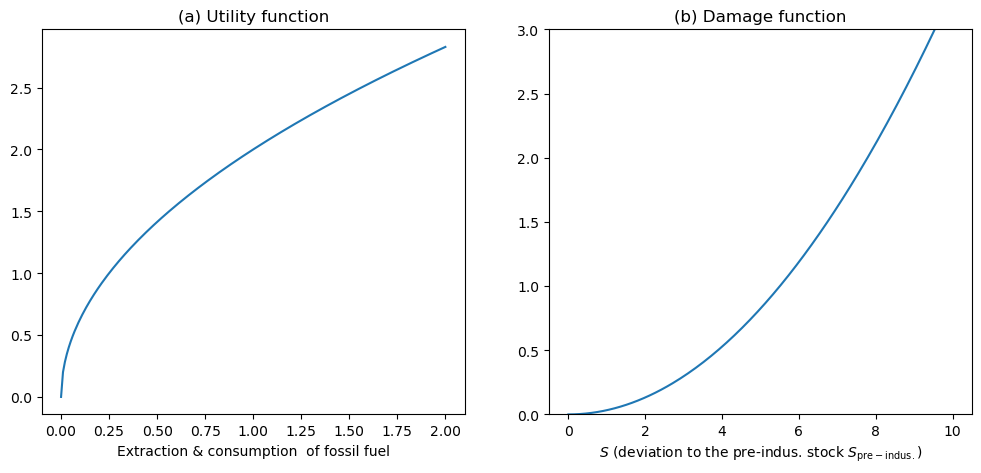

In [6]:
econ = econs['ref']
plt.figure(figsize=(12,5))
plt.subplot(121)
x = np.linspace(0,2,200)
plt.plot(x , econ.u(x))
plt.xlabel('Extraction & consumption  of fossil fuel')
plt.title('(a) Utility function')
plt.subplot(122)
S = np.linspace(0,10,200)
plt.plot(S , econ.damage(S))
plt.ylim([0,3])
plt.xlabel('$S$ (deviation to the pre-indus. stock $S_{\\mathrm{pre-indus.}}$)')
plt.title('(b) Damage function');

**Example of the calculation of the welfare function (W)**

In [7]:
x = np.zeros(econ.ndt) + 0.3
S0 = 0. # Stock corresponding to the deviation to the pre-industrial period.
econ.welfare(x, state0=S0), econ.objfunc(x, state0=S0)

(121.07786652096515, -121.07786652096515)

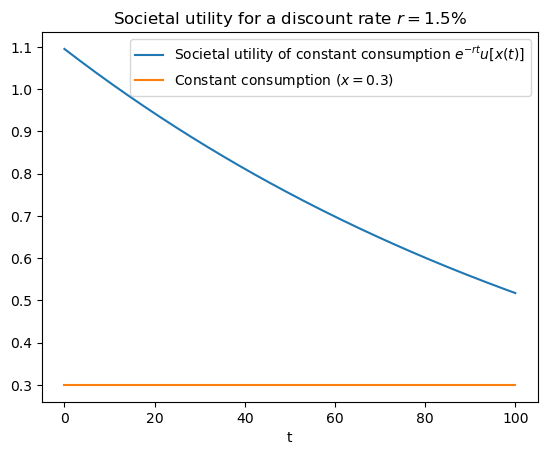

In [8]:
plt.plot(econ.time_window, econ.societal_utility(x,0),label='Societal utility of constant consumption $e^{-rt}u[x(t)]$')
plt.plot(econ.time_window, x,label=f'Constant consumption ($x=${x[0]:0.2})')
plt.legend()
plt.xlabel("t");
plt.title(f'Societal utility for a discount rate $r={econ.r*100}$%');
#plt.plot(econ.u(x))

***Results:***
Since the societal utility is positive (non-zero) over the time window, the optimization concerns the extraction over the full time window

**Optimization of the extraction to maximize societal welfare**

In [9]:
econ = econs['ref']
state0=0.
control = np.zeros(econ.ndt) + 0.03  # x
econ.optimize(state0=state0, bound=10., initial_control=control)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -128.07409310099524
            Iterations: 39
            Function evaluations: 7885
            Gradient evaluations: 39


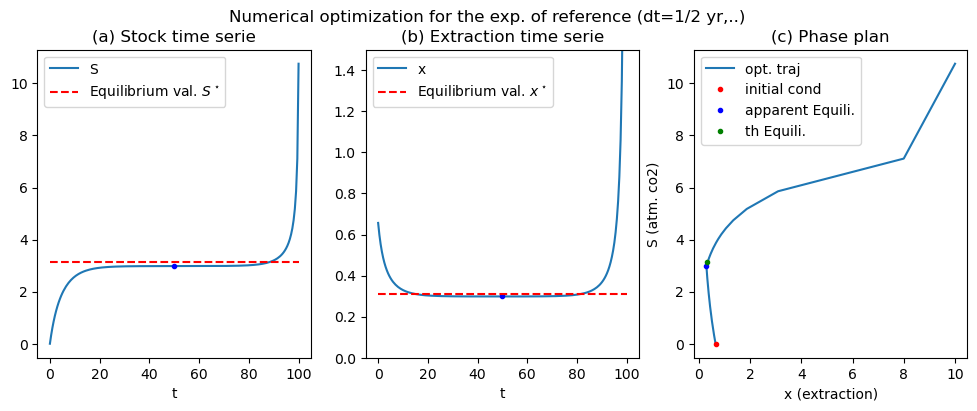

In [10]:
plot_traj(econ)
plt.suptitle('Numerical optimization for the exp. of reference (dt=1/2 yr,..)');

In [11]:
# solution stationnaire
econ.x_star, econ.S_star 

(0.3119626516967546, 3.1196265169675454)

In [12]:
# Quasi stationnary solution within the time window
econ.opt_control[econ.ndt//2], econ.opt_traj[econ.ndt//2]

(0.298290781626778, 2.982538360356963)

The next step is to show how the optimized path resulting from the social planner optimization can be used within a decentrelized economy through a carbon tax that implements the optimal policy.

## **3. Optimal policy within a decentrelized economy: how carbon tax can lead to reach the optimal path that optimized the social welfare**

### **3.1 No policy / No impact ($\omega=0$)**

To switch off the damage function we consider a non-negative but very low value of $\omega$ so that the relative contirbution of the damage function to the welfare is negligible.

In [13]:
econs['no-policy'] = HoelKverndokk(ω=1e-8)
econ = econs['no-policy']

Time scheme is Euler for Econ studies, with time step dt of 0.5 yr, over 100 years


**Utility and Damage functions**

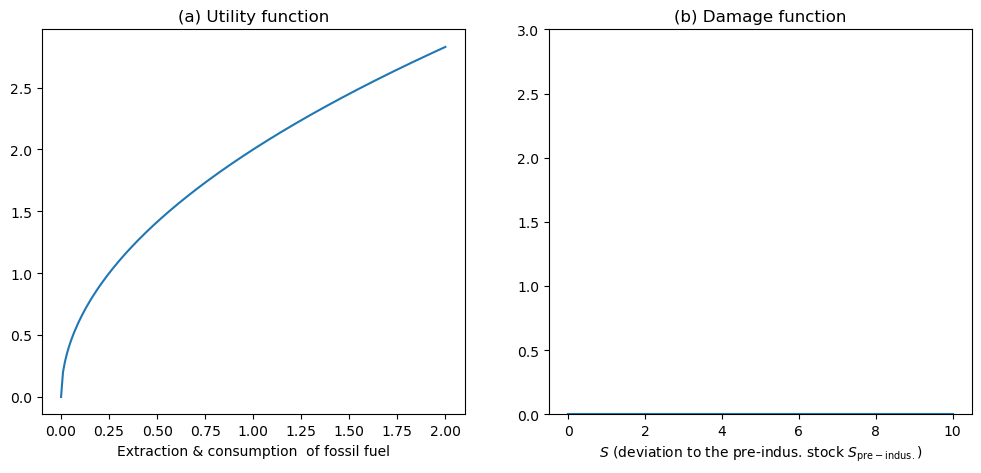

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
x = np.linspace(0,2,200)
plt.plot(x , econ.u(x))
plt.xlabel('Extraction & consumption  of fossil fuel')
plt.title('(a) Utility function')
plt.subplot(122)
S = np.linspace(0,10,200)
plt.plot(S , econ.damage(S))
plt.ylim([0,3])
plt.xlabel('$S$ (deviation to the pre-indus. stock $S_{\\mathrm{pre-indus.}}$)')
plt.title('(b) Damage function');

**Optimization of the extraction to maximize societal welfare**

In [15]:
state0=0.
control = np.zeros(econ.ndt) + 0.03  # x
econ.optimize(state0=state0, bound=10., initial_control=control)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -894.5248541702101
            Iterations: 13
            Function evaluations: 2626
            Gradient evaluations: 13


In [16]:
econ.opt_control

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10

Note that this result is also understood from the optimal stationnary extraction (equilibrium) whose value growth as $\frac{1}{\omega^{1/(1+\gamma)}}\rightarrow\infty$.

### **3.2 Internalization of externality by introducing a carbon tax**

**Formulation of the optimal extraction given a policy (arbitrary and not necessarily optimal)**

We now consider that government policy can apply to adjust the production. 

This policy is given as a **carbon tax $\theta(t)$**, that is a function of time and that should be used so to obtain a trajectory of production and pollution that should be equivalent to the optimal path when the carbon tax is optimal.

In that framework, the optimization problem is given as 

$$
\left\{\begin{array}{l}
 x^\ast_\theta = \underset{x}{\textrm{ArgMax}}\, W\equiv \int_0^T e^{-r t } \left( u(x) - \theta(t) x\right)dt \\ 
\text{ s.t.}\\
\dot S = x - \delta S, \\
\text{ with } S(0)=S_0, x(t)\geq 0 \text{ and } S(t)\geq 0.
\end{array}\right.$$

Whose solution is given as (first order condition of stationnarity)

$$\forall t \in [0,T],\;u'[x^*_\theta(t)]-\theta(t) = 0,$$

**Solving the optimal extraction given a policy $\theta$**

We propose to illustrate this by considering two methods of resolution.

 1) Optimization
 2) Iterative method

**The optimal policy**

In the Lagrangian formulation of the social planner,
$$ \underset{x}{\mathrm{Max}} \;\underset{\mu\in\mathbb{R}}{\mathrm{Min}} \; \int_0^\infty e^{-rt}\mathcal{L}(x,S,\dot S,\mu) dt,$$
with 
$$ \mathcal{L}(x,S,\dot S,\lambda,\mu)\equiv u(x)-D(S)+\mu\left(\dot S -x+\delta S\right),$$
**$\mu$ is the shadow price** related to the extraction and to the stock of atmospheric carbon, and is defined as 
$$\mu^* = u'[x^*(t)],$$
when the optimal trajectory $x^*$ is known (computed from the numerical optimization).

Then we obtain that $x^* = x^*_{\mu^*}$ where the former is the social planner optimal path and the latter is the optimal extraction path given the optimal policy.

**Arbitrary versus optimal policy**

Computation of the optimal policy resulting from the optimal social planner problem.

In [17]:
mu = econs['ref'].u_prime(econs['ref'].opt_control)
theta_optimal = mu

Arbitrary policy used to test the optimality of the associated policy.

In [18]:
theta = 1+np.sin(np.pi*econs['ref'].time_window/econs['ref'].time_window[-1])

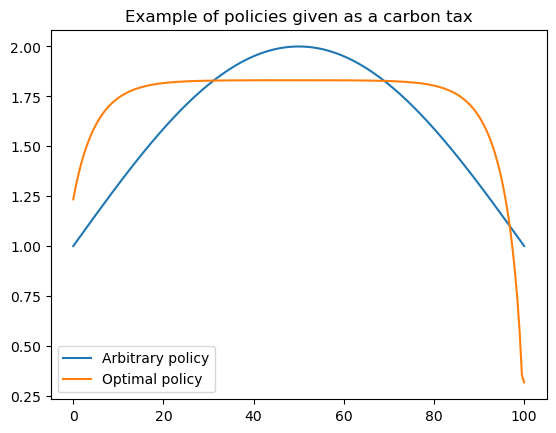

In [19]:
plt.plot(econs['ref'].time_window, theta, label='Arbitrary policy')
plt.plot(econs['ref'].time_window, theta_optimal, label='Optimal policy')
plt.legend()
plt.title("Example of policies given as a carbon tax");

#### **3.2.1 Optimization from an arbitrary policy (not necessary an optimal policy)**


In this paragraph we determine the extraction path that optimize the utility under a given carbon tax scenario (a policy). 

This is only an illustration that the solution can be obtained like this. 

In [20]:
class HoelKverndokkUnderPolicyCarbonTax(HoelKverndokk):
    '''
    Economical model that represent
    '''
    def __init__(self, policy=None, **kwargs):        
        super().__init__(**kwargs)        
        self._policy = policy
        
    def societal_utility(self, control, traj):
        S = traj
        x = control        
        return (self.u(x)-self._policy*x )*np.power(self.β,self.time_window)
                    

In [21]:
econs['policy-arbitrary'] = HoelKverndokkUnderPolicyCarbonTax(policy=theta)
econ = econs['policy-arbitrary']

Time scheme is Euler for Econ studies, with time step dt of 0.5 yr, over 100 years


In [22]:
state0=0.
control = np.zeros(econ.ndt) + 0.01  # x
econ.optimize(state0=state0, bound=10., initial_control=control)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -90.71188792516347
            Iterations: 19
            Function evaluations: 3843
            Gradient evaluations: 19


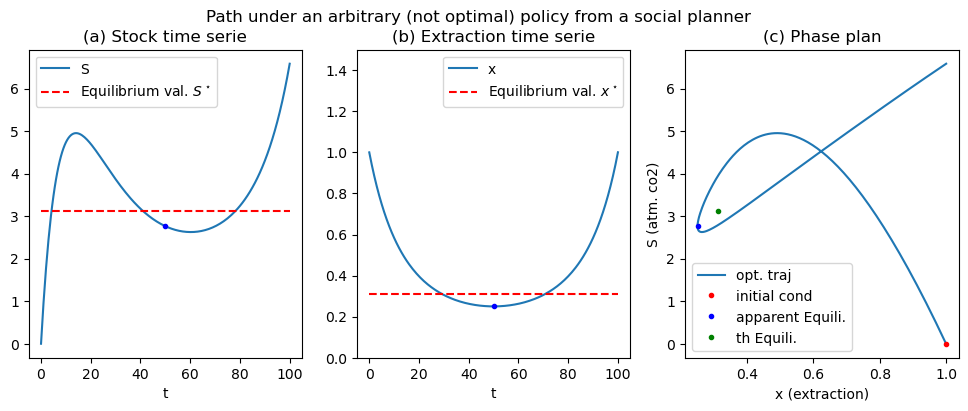

In [23]:
plot_traj(econ)
plt.suptitle('Path under an arbitrary (not optimal) policy from a social planner');

In [24]:
w_opt = econs['ref'].welfare(econs['ref'].opt_control,0)
w_arbitrary_policy = econs['ref'].welfare(econ.opt_control,0)
print("Social Welfare for the optimal path: ", w_opt)
print("Social Welfare when considering the arbitrary policy: ", w_arbitrary_policy)
print(f"relative error: {(w_arbitrary_policy-w_opt)/w_opt*100:0.3}%")

Social Welfare for the optimal path:  128.07409310099524
Social Welfare when considering the arbitrary policy:  116.09766895257579
relative error: -9.35%


#### **3.2.2 Sequential method to get the extraction that maximize the pofit under the given policy**

**Sequential determination of the extraction that optimized a given policy**

The policy $\theta$ been given (that is the time serie of the carbon tax $\theta(t)$), the goal is to find the extraction $x(t)$ solution of $u'[x(t)]=\theta(t)$.

But solving this equation is equivalent of solving the following ones leading to a fixed point problem
$$
\begin{eqnarray}
u'[x(t)]&=&\theta(t),\\
u'[x(t)]-\theta(t)&=&0,\\
\alpha(u'[x(t)]-\theta(t))&=&0,\; \text{ with }0<\alpha<1,\\
x+\alpha(u'[x(t)]-\theta(t))&=&x,\\
\end{eqnarray}
$$
Hence, the extration path given the policy $\theta$ is solution of the fixed point problem
$$F(x)=x,$$ with $$F(x)=x+\alpha(u'(x)-\theta),$$
$0<\alpha<1$.

In [25]:
def F(x, theta):
    alpha = 0.2
    return x+alpha*(econs['ref'].u_prime(x)-theta)

In [26]:
# Iterations 
x = np.zeros(econs['ref'].ndt) + 0.1  # x
for k in range(500):
    x = F(x, theta)

**Toward a decentrelized version of the social planner**

We observe that this resolution does not relies on the optimization as in the previous paragraph or for solving the social planner problem.

In particular, given the extraction that optimized the carbon tax / the policy, then we can compute the path for the time evolution of the carbon stock present in the atmospher by interagting the stock dynamics 
$$\dot S = x -\delta S.$$
This corresponds to a decentrelized version of the social planner problem

In [27]:
traj = econs['ref'].predict(0, x)

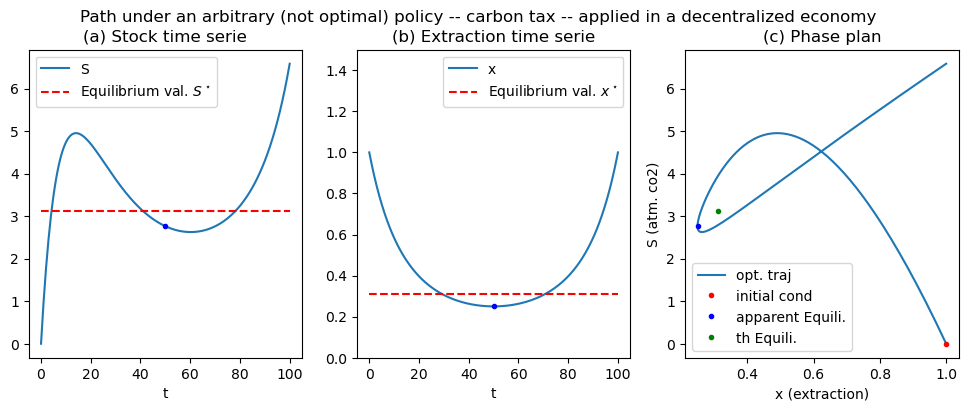

In [28]:
plot_traj(econs['ref'], control = x, traj = traj)
plt.suptitle('Path under an arbitrary (not optimal) policy -- carbon tax -- applied in a decentralized economy');

<div style="background:lightgreen;margin:0 50px 0 50px">
<b>Conclusion</b><br>
The numerical optimization is in accordance with the theoretical equilibrium solution for infinite time window.    
Note that for this numerical resolution, no optimization has been needed: the optimal extraction path given the policy has been computed from the iterative approach, then from this optimal extraction path we computed the time evolution of atmospheric stock of carbon.
 </div>


#### **3.2.3 Optimal path recovered from considering the optimal policy (optimal carbon tax) -- solution from iterative method**

We now consider the cas of a decentrelized economy where the carbon tax is set as optimal. 

With this setting, the path should be optimal.

In [29]:
# Computation of the optimal Iterations 
x = np.zeros(econs['ref'].ndt) + 0.1  # x
for k in range(500):
    x = F(x, theta_optimal)

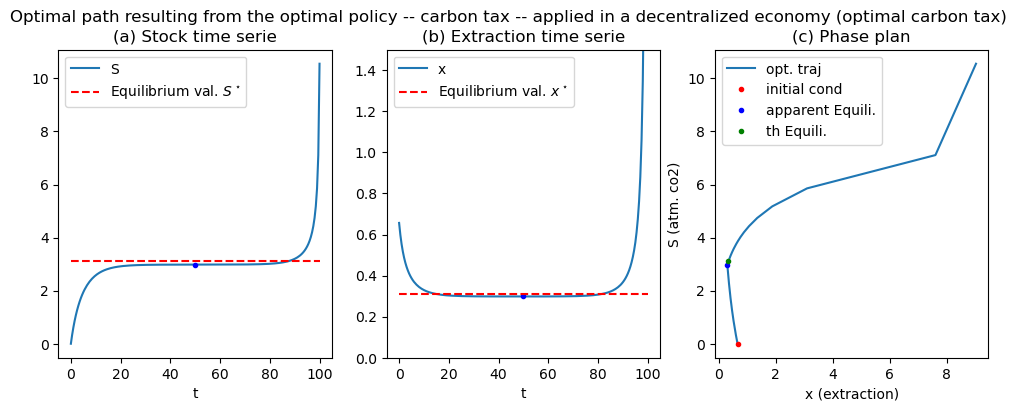

In [30]:
traj = econs['ref'].predict(0, x)
plot_traj(econs['ref'], control = x, traj = traj)
plt.suptitle('Optimal path resulting from the optimal policy -- carbon tax -- applied in a decentralized economy (optimal carbon tax)');

In [31]:
# solution stationnaire
econs['ref'].x_star, econs['ref'].S_star 

(0.3119626516967546, 3.1196265169675454)

In [32]:
x[econ.ndt//2], traj[econ.ndt//2] #S

(0.298290781626778, 2.9825383603569624)

In [33]:
w_opt = econs['ref'].welfare(econs['ref'].opt_control,0)
w_opt_policy = econs['ref'].welfare(x,0)
print("Social Welfare for the optimal path: ", w_opt)
print("Social Welfare when considering the arbitrary policy: ", w_opt_policy)
print(f"relative error: {(w_opt_policy-w_opt)/w_opt*100:0.3}%")

Social Welfare for the optimal path:  128.07409310099524
Social Welfare when considering the arbitrary policy:  127.92274313583601
relative error: -0.118%


**Conclusion**


<div style="background:lightgreen;margin:0 50px 0 50px">
<b>Conclusion</b><br>
It appears that considering the optimal policy (shadow price resulting from the social planner optimization of the social welfare including the damage due to the accumulation of carbon in the atmosphere) we verify that the resulting welfare is the optimal one.
</div>


### **3.3 Subsidies as an incentive alternative to (punitive) carbon taxes**

**Formulation of the optimal extraction given a policy (arbitrary and not necessarily optimal)**

We now consider that government policy can apply to adjust the production. 

This policy is given as **a subsidy in place of the carbon tax $\theta(t)$**, that is a function of time and that should be used so to obtain a trajectory of production and pollution that should be equivalent to the optimal path when the policy is optimal.

In that framework, the optimization problem is given as 

$$
\left\{\begin{array}{l}
 x^\ast_\theta = \underset{x}{\textrm{ArgMax}}\, W\equiv \int_0^T e^{-r t } \left( u(x) + \theta(t) (x^p-x)\right)dt \\ 
\text{ s.t.}\\
\dot S = x - \delta S, \\
\text{ with } S(0)=S_0, x(t)\geq 0 \text{ and } S(t)\geq 0.
\end{array}\right.$$

where $x^p$ is a particlar 
Whose solution is given as (first order condition of stationnarity)

$$\forall t \in [0,T],\;u'[x^*_\theta(t)]-\theta(t) = 0,$$

**Implementation of the social planner**

In [34]:
class HoelKverndokkUnderPolicySubsidy(HoelKverndokk):
    '''
    Economical model that represent
    '''
    def __init__(self, policy=None, xp=10, **kwargs):        
        super().__init__(**kwargs)        
        self._policy = policy
        self._xp = xp
        
    def societal_utility(self, control, traj):
        S = traj
        x = control        
        return (self.u(x)+self._policy*(self._xp-x))*np.power(self.β,self.time_window)
                    

#### **3.3.1 Subsidies for arbitrary policy**

In [35]:
econs['policy-subsidy-arbitrary'] = HoelKverndokkUnderPolicySubsidy(policy=theta)
econ = econs['policy-subsidy-arbitrary']

Time scheme is Euler for Econ studies, with time step dt of 0.5 yr, over 100 years


In [36]:
state0=0.
control = np.zeros(econ.ndt) + 0.01  # x
econ.optimize(state0=state0, bound=10., initial_control=control)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2391.874951629916
            Iterations: 19
            Function evaluations: 3843
            Gradient evaluations: 19


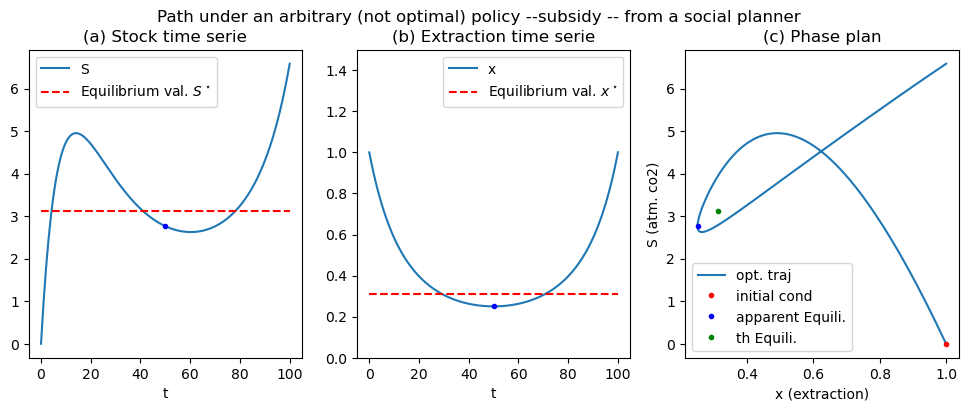

In [37]:
plot_traj(econ)
plt.suptitle('Path under an arbitrary (not optimal) policy --subsidy -- from a social planner');

In [38]:
w_opt = econs['ref'].welfare(econs['ref'].opt_control,0)
w_arbitrary_policy = econs['ref'].welfare(econ.opt_control,0)
print("Social Welfare for the optimal path: ", w_opt)
print("Social Welfare when considering the arbitrary policy: ", w_arbitrary_policy)
print(f"relative error: {(w_arbitrary_policy-w_opt)/w_opt*100:0.3}%")

Social Welfare for the optimal path:  128.07409310099524
Social Welfare when considering the arbitrary policy:  116.09785566278944
relative error: -9.35%


#### **3.3.2 Subsidies for optimal policy**

In [39]:
econs['policy-subsidy-optimal'] = HoelKverndokkUnderPolicySubsidy(policy=theta_optimal)
econ = econs['policy-subsidy-optimal']

Time scheme is Euler for Econ studies, with time step dt of 0.5 yr, over 100 years


In [40]:
state0=0.
control = np.zeros(econ.ndt) + 0.01  # x
econ.optimize(state0=state0, bound=10., initial_control=control)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2538.136107147551
            Iterations: 42
            Function evaluations: 8489
            Gradient evaluations: 42


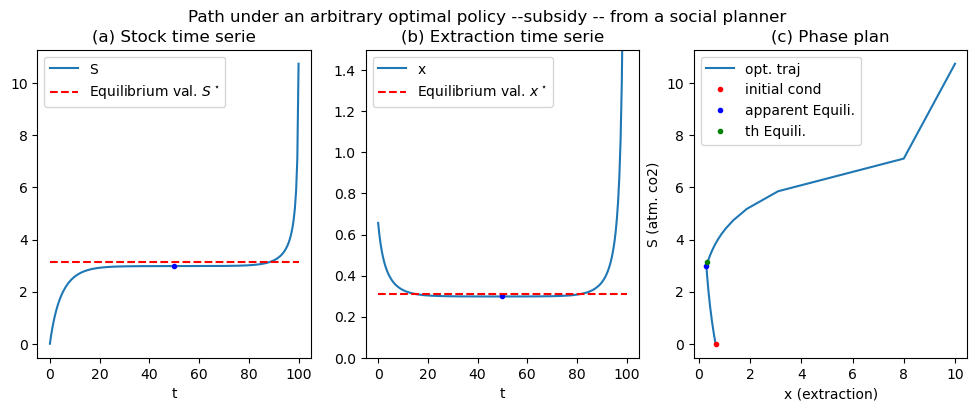

In [41]:
plot_traj(econ)
plt.suptitle('Path under an arbitrary optimal policy --subsidy -- from a social planner');

In [42]:
w_opt = econs['ref'].welfare(econs['ref'].opt_control,0)
w_arbitrary_policy = econs['ref'].welfare(econ.opt_control,0)
print("Social Welfare for the optimal path: ", w_opt)
print("Social Welfare when considering the arbitrary policy: ", w_arbitrary_policy)
print(f"relative error: {(w_arbitrary_policy-w_opt)/w_opt*100:0.3}%")

Social Welfare for the optimal path:  128.07409310099524
Social Welfare when considering the arbitrary policy:  128.07404869979342
relative error: -3.47e-05%


## **Conclusion**

<div style="background:lightgreen;margin:0 50px 0 50px">
<b>Conclusion</b><br>
    
In this work 
    <ul>
        <li>We have introduced a simplified version of the HK model, that explain us how to obtain an optimal policy that enlights climate change mitigation        
            </ul>
<b>Perspectives</b><br>
        <ul>
        <li>The simplified model introduced here can not apply in the climate change because it has not been calibrated: how should we fix the parameters ($\delta$,..) ? It would be interesting to see if a calibration of this simple model can challenge the more complexe IAMs as DICE, at an academical level, while of course this is not the goal of the HK model.
            <li> Another challenge is to understande the difference with a full version of the HK model where extraction can be planned and that takes into account the finitness of the exhaustible fossil fuel.
            </ul>
 </div>
